# Polynomial Regression from Scratch
## Import some library that we need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Initialize the data

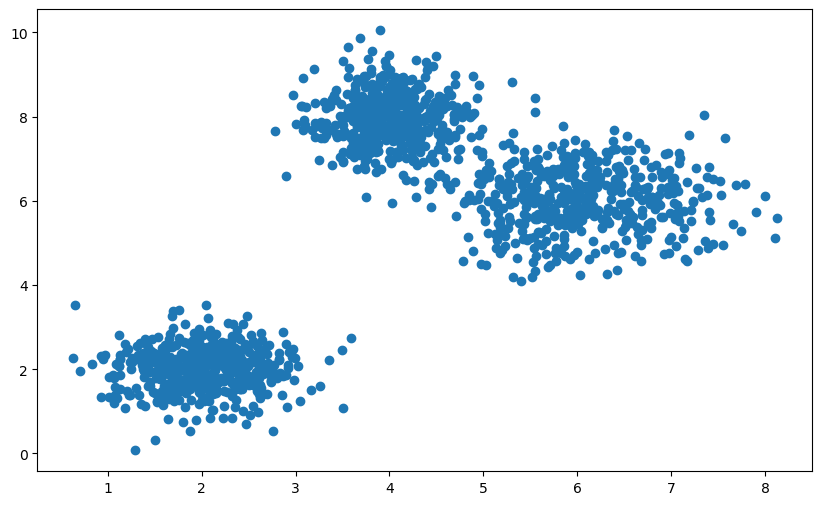

In [2]:
# Number of data points in each cluster
num_points = 500

# Generate data for three clusters
cluster1 = np.random.normal(loc=[2, 2], scale=[0.5, 0.5], size=(num_points, 2))
cluster2 = np.random.normal(loc=[6, 6], scale=[0.7, 0.7], size=(num_points, 2))
cluster3 = np.random.normal(loc=[4, 8], scale=[0.4, 0.6], size=(num_points, 2))

# Combine the clusters
x = np.concatenate((cluster1[:, 0], cluster2[:, 0], cluster3[:, 0]))
y = np.concatenate((cluster1[:, 1], cluster2[:, 1], cluster3[:, 1]))

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

## Create the feature matrix

Here we need to create feature from the data. We will create a feature matrix with the shape of (n, d) where n is the number of data and d is the degree of the polynomial. We will use the following formula to create the feature matrix:

$$
\begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^d \\
1 & x_2 & x_2^2 & \dots & x_2^d \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^d \\
\end{bmatrix}
$$

In [3]:
class CustomFeatureTransformer:
    def __init__(self, degree, is_bias=True):
        self.is_bias = is_bias
        self.degree = degree
    
    def transform(self, x = None):
        if x is None:
            raise ValueError('x is None')
        if self.is_bias:
            x = np.c_[np.ones(x.shape[0]), x]
        for i in range(2, self.degree + 1):
            x = np.c_[x, x[:, 1] ** i]
        return x
    
    def fit_transform(self, x):
        return self.transform(x)

In [4]:
degree = 1
poly = CustomFeatureTransformer(degree, is_bias=True)
x_poly = poly.fit_transform(x=np.array(x).reshape(-1, 1))

## Create the model from scratch

In sklearn, we need to create a model object and then fit the data to the model. In this case, we will create a class called `PolynomialRegression` and then we will create a method called `fit` to fit the data to the model. We will also create a method called `predict` to predict the data.

In [5]:
class CustomLinearRegression:
    def __init__(self):
        self.w = None
    
    def fit(self, x, y):
        self.w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    
    def predict(self, x):
        return x.dot(self.w)
    
    def score(self, x, y):
        y_pred = self.predict(x)
        return 1 - ((y - y_pred)**2).sum() / ((y - y.mean())**2).sum()

In [6]:
my_model = CustomLinearRegression()
my_model.fit(x_poly, y)
y_pred = my_model.predict(x_poly)

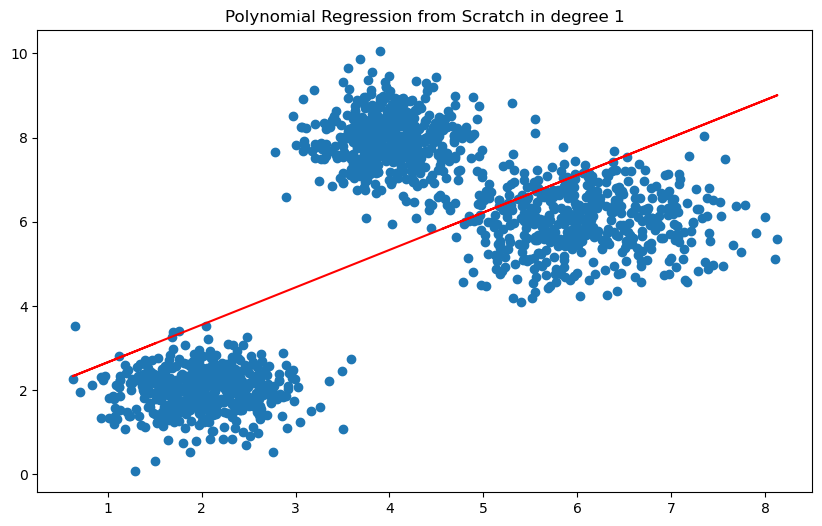

In [7]:
plt.figure(figsize=(10,6))
plt.title('Polynomial Regression from Scratch in degree {}'.format(degree))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

## Create MSE function and MAE function

In [8]:
class MAE:
    def __call__(self, y, y_pred):
        return np.mean(np.abs(y - y_pred))
    
    def gradient(self, y, y_pred):
        return np.sign(y - y_pred)
    
class MSE:
    def __call__(self, y, y_pred):
        return np.mean((y - y_pred)**2)
    
    def gradient(self, y, y_pred):
        return 2 * (y_pred - y)

In [9]:
print('Accuracy of my model: ', my_model.score(x_poly, y))
print('MSA of my model: ', MSE()(y, y_pred))
print('MAE of my model: ', MAE()(y, y_pred))

Accuracy of my model:  0.3619474380580031
MSA of my model:  4.179428724407287
MAE of my model:  1.8047302201466306
